<a href="https://colab.research.google.com/github/aljeshishe/notebooks/blob/master/transfer_learning_cat_dogs_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon May 11 22:25:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
pip install kaggle -q

In [0]:
import json
token = {'username':'aljeshishe','key':'32deca82aa1c29fbaeadcce2bf470af4'}
with open('kaggle.json', 'w') as file:
    json.dump(token, file)

In [8]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.0MB/s]
 97% 527M/543M [00:04<00:00, 85.8MB/s]
100% 543M/543M [00:04<00:00, 119MB/s] 
 96% 261M/271M [00:02<00:00, 97.6MB/s]
100% 271M/271M [00:02<00:00, 104MB/s] 


In [0]:
%%sh
rm -rf test1
rm -rf train
unzip test1.zip > /dev/null
unzip train.zip > /dev/null

In [11]:
!pip install wandb -q
import os
os.environ["WANDB_API_KEY"] = "723983b2d42ccd7c5510bbeb0549aa73f1242844"

     |████████████████████████████████| 1.4MB 5.0MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 112kB 29.8MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 460kB 15.5MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 


In [0]:
pip install image-classifiers -q

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

train_dir = 'train/'
test_dir = 'test1/'
filenames = os.listdir(train_dir)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("1")
    else:
        categories.append("0")

In [0]:
import wandb
import keras
m1 = keras.models.load_model(wandb.restore("model-best.h5", 'grachev/uncategorized/runs/2vqdktkd').name)


In [15]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False
)
import itertools

x_ = []
y_ = []
i = 0
for x_batch, y_batch in itertools.islice(validation_generator, 1000):
  for x, y in zip(x_batch, y_batch):
    x_.append(x)
    y_.append(y)
x_ = np.array(x_)
y_ = np.array(y_)

Found 25000 validated image filenames belonging to 2 classes.


In [16]:
x_.shape, y_.shape

((1000, 224, 224, 3), (1000,))

In [0]:
preds = m1.predict(x_)

0.6653162 0.0
0.36625838 1.0
0.05445236 1.0
0.035911817 1.0
0.8455888 0.0
0.21892384 1.0
0.0009123507 1.0
0.48529267 1.0
0.20801331 1.0
0.29410002 1.0
0.013954623 1.0
0.37437522 1.0
0.09275117 1.0
0.7659732 0.0
0.004116567 1.0
0.010484494 1.0


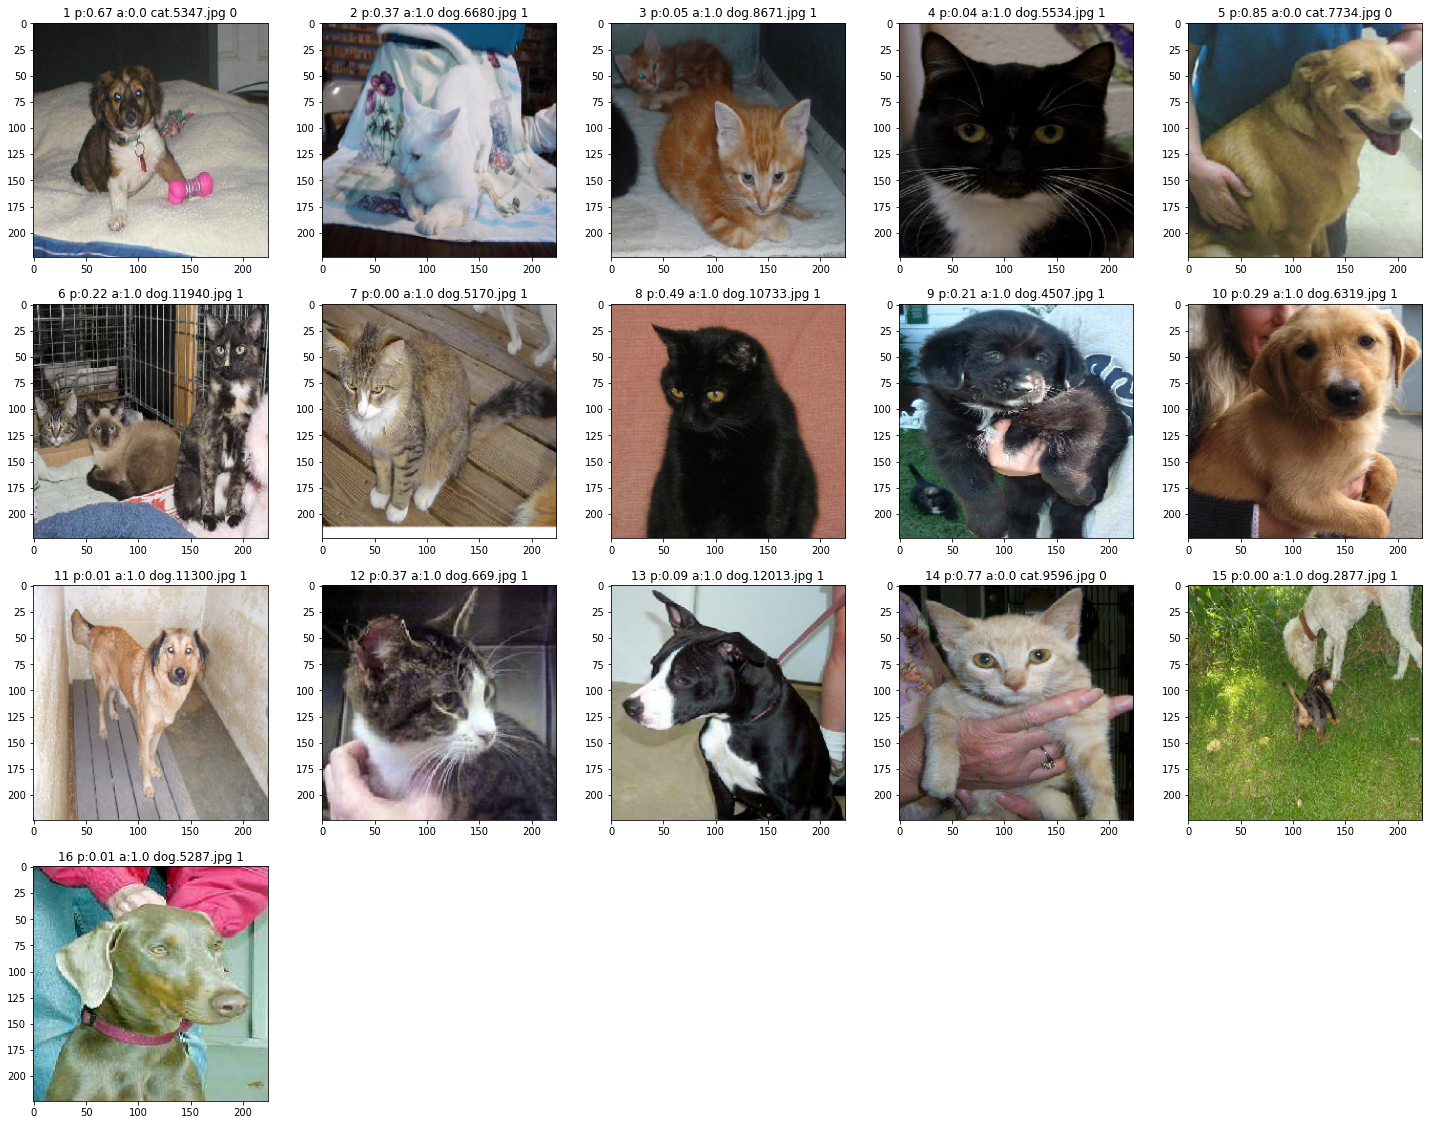

In [18]:
fig = plt.figure(figsize=(25,25))
i = 0
for pred, y, filename, category in zip(preds, y_, filenames, categories):
    pred = pred[0]
    if round(pred) != y:
      print(pred, y)
      i += 1
      fig.add_subplot(5,5, i)        
      plt.imshow(x_[i])
      plt.title(f'{i} p:{pred:.2f} a:{y} {filename} {category}')
#print(f'Test accuracy: {(1 - len(mistakes)/len(tests)):.2f} ({len(mistakes)} of {len(tests)})')
fig.show()